# Øvelse 4 - Havets rolle

I siste øvelsen så vi hvordan ulike tilbakekoblingsmekanismer ka være med til at forsterke en klimaendring. I denne øvelsen ska vi se på betydningen av dybhavet og hvordan varmeoptak i havet kan regulere overflatetemperaturen på jorden. 

I toboksmodellen er utveksling av energi mellom mikslaget i havet og dyphavet representert via parameteren $\gamma$ [W/(m$^2$K)] (se illustration nedenfor). Det er et mål for hvor rask dybhavet tar opp ekstra varme som følge av en øking i global overflatetemperatur. 

Hvis verdien av $\gamma$ er høy betyr det at der er en effektiv utveksling av energi til dybhavet. Hvis den er null er der ingen utveksling mellom overflaten og dybhavet. 

<img src="bilder/2D_model_schematic.png" style="width:50%" >


# Varmeoptakk fra havet i perioden 1750-2011


I de forrige øvelsene har vi fokusert på endringene i overflatetemperatuen (`Ts`) og hvordan vi mennesker har bidraget til denne oppvarming gjennom utslipp av drivhusgasser. Her brukte vi en verdi for $\gamma$ som var -0.69. 

Denne verdien er basert på globalle klimamodeller (akkurat som $\lamdba$ verdiene) fra `Dufresne and Bony, 2008`. 

<img src="bilder/table_gamma_values.png" style="width:50%">

I denne øvelsen ska vi se på hvordan overflatetemperaturen gjennom de siste 200 årene utvikler sig hvis vi endrer på varmeopptaket i havet.


In [2]:
# Lese inn relavente python pakker vi ska bruke
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook # inkluder denne linjen om du vil åpne i Jupyter Notebook og vil lage interaktive plott
%matplotlib inline

from toboks import calculate_temp_anomalies # henter funksjonen som beregner temperaturanomalier basert på toboksmodellen

**Last inn strålingspådriv for perioden 1750-2011**

In [3]:
# les inn historisk data fra filen 'historical.csv'
df=pd.read_csv('forcing-files/historical.csv',index_col = 0,sep=',',encoding = "utf-8")

print('Strålingspådriv i W/m2 \n \n', df)

Strålingspådriv i W/m2 
 
         wmghg_data  solar_data  volc_data  landuse_data  manaero_data
year                                                                 
1751.0      -0.019      -0.014      0.000         0.000        -0.002
1752.0      -0.018      -0.029      0.000        -0.001        -0.004
1753.0      -0.017      -0.033      0.000        -0.001        -0.005
1754.0      -0.017      -0.043      0.000        -0.002        -0.007
1755.0      -0.016      -0.054     -0.664        -0.002        -0.009
...            ...         ...        ...           ...           ...
2007.0       2.697      -0.017     -0.100        -0.150        -0.907
2008.0       2.728      -0.025     -0.100        -0.150        -0.904
2009.0       2.761      -0.027     -0.125        -0.150        -0.902
2010.0       2.794       0.001     -0.100        -0.150        -0.900
2011.0       2.831       0.030     -0.125        -0.150        -0.900

[261 rows x 5 columns]


## Opgave

* Forsøk#1: 'Hist_varmeopptakPå', Bruk strålingspådriv for perioden 1750-2011 og $\gamma=-0.69$ (samme som i forrige øvelsen)

* Forsøk#2: 'Hist_varmeopptakHalvert', Samme som Forsøk#1 men sett $\gamma=-0.35$ (halve verdien)

* Forsøk#3:'Hist_varmeopptakAv', Samme som Forsøk#1, men slå av varmeopptakket i havet av ved at sette $\gamma=0$.  
 
I begge forsøk ha **alle tilbakekoblingseffekter slået på** (bruk verdier fra Tabel)

For hver av disse forsøk beregner og plotter vi endringen i overflatetemperaturen (`Ts`). 

**Beregn samlede strålingspådriv og sett verdi for for tilbakeboblingseffekter (lambda)**

In [4]:
# Strålingspådriv                                                                                                 
total_forcing = df['wmghg_data']+df['solar_data']+df['volc_data']+df['landuse_data']+df['manaero_data']

# konverter dataframe til data-array                                                                                
radiative_forcing = total_forcing.to_numpy()               

# verdier hentet fra Tabel
lambda_planck=-3.1     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]                       
lambda_lapse=-0.6      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]                                  
lambda_vanndamp=1.7       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]                                   
lambda_sky=0.50      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]                                       
lambda_albedo=0.40     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]           

# Summen av disse 
lambda_sum=sum([lambda_planck,                                                                                      
    lambda_lapse,                                                                                                   
    lambda_vanndamp,                                                                                                   
    lambda_sky,                                                                                                   
    lambda_albedo])  


**Kjør toboksmodellen med varmeopptak av og på og studer plottet**

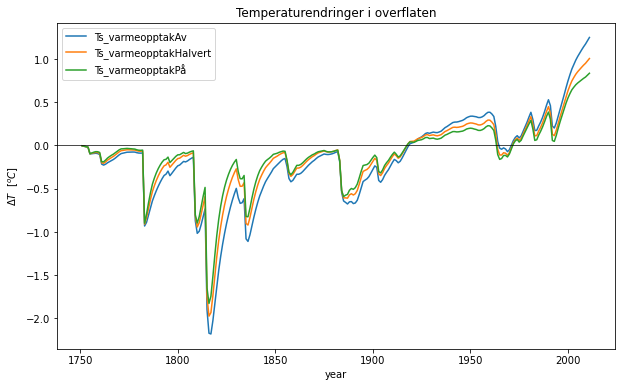

In [6]:
# sett verdi for gamma
gamma = (-0.69, -0.35, 0)

temp = pd.DataFrame(index=df.index) # vi lager en ny dataramme som har samme indexer (i.e. årstal) som pådrivet

# kaller opp funksjonen som regner ut temperaturendringene                                                          
temp['Ts_varmeopptakPå'], temp['To_varmeopptakPå']= calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma[0])                                  
temp['Ts_varmeopptakHalvert'], temp['To_varmeopptakPå']= calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma[1])                                  
temp['Ts_varmeopptakAv'], temp['To_varmeopptakAv']= calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma[2]) # gamma=0

# plot temperaturendringer for Forsøk #1 og #2
temp.plot(figsize=(10,6), y=['Ts_varmeopptakAv', 'Ts_varmeopptakHalvert', 'Ts_varmeopptakPå'],ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer i overflaten")
plt.axhline(y=0, linewidth=0.7, color="black")



**Finn temperatur-forskell med og uten varmeopptak i år 2011**

In [36]:
year = 2011
Tforskel = temp['Ts_varmeopptakAv'].loc[year] - temp['Ts_varmeopptakPå'].loc[year] 
Tforskel
#print('Temperature change at year', year, ':', "%.2f" %(Tloc),'°C')

0.4137864557075742

# Spørgsmål til opgaven

* Hvor stor en betydning har det å slå av varmeopptaket i havet for overflatetemperaturen?

* Har havet en *avkjølende* eller *nedkjølene* effekt på klimaet? 


## Svar til opgaven

Hvis vi slår på varmeoptaket til havet stiger overflatetemperaturen med ca. *0.4°C*. Havet medvirker altså til at senke overflatetemperaturen og dermed begrense oppvarmingen. 